In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', -1)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [3]:
data = pd.read_csv('SMSSpamCollection', sep="	", header=None)
data.columns = ["Class", "Text"]

In [4]:
data

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
proporcja = data['Class'].value_counts()   
proporcja

ham     4825
spam     747
Name: Class, dtype: int64

<BarContainer object of 2 artists>

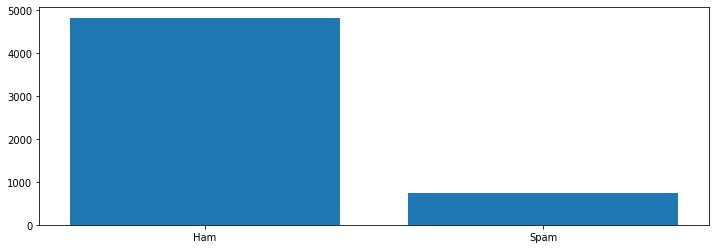

In [6]:
names = ['Ham', 'Spam']
values = [4825,747]

plt.figure(figsize=(12,4))
plt.bar(names, values) 

#proporcje w zbiorze - występuje istotna dysproporcja, przewazaja w duzej ilosci wiadomosci normalne, nie bedące spamem

In [7]:
Duplicates = data[data.duplicated(keep=False)]
Duplicates

,Class,Text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


684 4888


<BarContainer object of 2 artists>

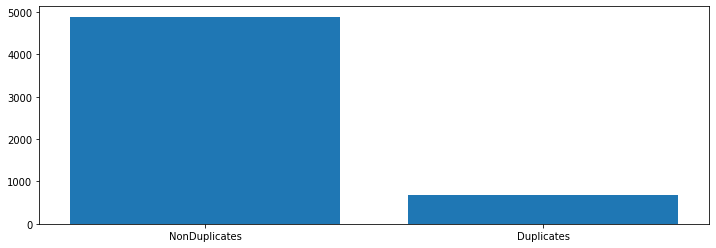

In [8]:
D = Duplicates.count()[0]
NonD = data.count()[0] - D
print(D,NonD)


names = ['NonDuplicates', 'Duplicates']
values = [NonD,D]

plt.figure(figsize=(12,4))
plt.bar(names, values) 

In [9]:
#Najczestsze wiadomosci:

Ham = data[data['Class']=='ham']
Spam = data[data['Class']=='spam']

display(Ham.mode())
print("")
display(Spam.mode())

,Class,Text
0,ham,"Sorry, I'll call later"


,Class,Text
0,spam,Please call our customer service representativ...


In [10]:
Multiclass = pd.DataFrame(pd.merge(Ham,Spam,on = 'Text', how= 'outer',indicator = True))
Multiclass['_merge'].value_counts()
#brak elementow znajdujacych się w obu klasach jednoczesnie

left_only     4825
right_only     747
both             0
Name: _merge, dtype: int64

In [11]:
data['length'] = data['Text'].apply(len)
data.head()

,Class,Text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


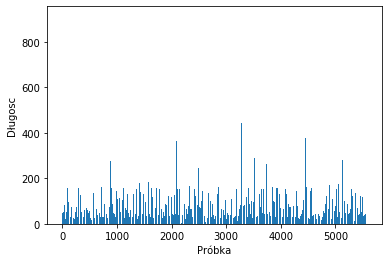

In [12]:
Wykres = {'a': data.index.tolist(),      #Wykres dlugosci wiadomosci
          "b" : data['length'].tolist()
        }

plt.bar('a', 'b', data=Wykres)
plt.xlabel('Próbka')
plt.ylabel('Długosc')
plt.show()

In [13]:
Most_pop = pd.DataFrame(Counter(" ".join(data["Text"]).split()).most_common(16))
Most_pop.columns = ["Slowa", "Wystapienia"]
Most_pop

,Slowa,Wystapienia
0,to,2145
1,you,1626
2,I,1469
3,a,1337
4,the,1207
5,and,858
6,in,800
7,is,788
8,i,748
9,u,698


In [14]:
Most_popSpam = pd.DataFrame(Counter(" ".join(Spam["Text"]).split()).most_common(16))
Most_popSpam.columns = ["Slowa", "Wystapienia"]
Most_popSpam

,Slowa,Wystapienia
0,to,607
1,a,360
2,your,187
3,call,185
4,or,185
5,the,178
6,2,169
7,for,169
8,you,164
9,is,143


In [15]:
Most_popHam = pd.DataFrame(Counter(" ".join(Ham["Text"]).split()).most_common(16))
Most_popHam.columns = ["Slowa", "Wystapienia"]
Most_popHam

,Slowa,Wystapienia
0,to,1538
1,you,1462
2,I,1439
3,the,1029
4,a,977
5,i,742
6,and,739
7,in,736
8,u,651
9,is,645


W smsach nie spamowych duzo czesciej wystepuja slowa takie jak you, I oraz and.

# Preprocessing danych

In [16]:
def preprocess1(test_string):

# initializing bad_chars_list 
    bad_chars = [';', ':', '!', "*",",",".", "/","\ ","?", "(", ")", "$","#","&","!","@","%","^", "-"] 
    
# using replace() to remove bad_chars  
    for i in bad_chars : 
        test_string = test_string.replace(i, '')
        test_string = test_string.lower()
        
    
    return test_string

In [17]:
lista = data['Text'].tolist()
wynik = []
wynik2 = []

for i in lista:
    a =  preprocess1(i)
    wynik.append(a)
for j in wynik:
    b = j.split()
    wynik2.append(b)

In [18]:
data['Processed'] = pd.Series(wynik2)

In [19]:
data #data z malymi literkami,podzielona na tokeny, bez znakow interpunkcyjnych

,Class,Text,length,Processed
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, i, don't, think, he, goes, to, usf, he, ..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,Will ü b going to esplanade fr home?,36,"[will, ü, b, going, to, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"[pity, was, in, mood, for, that, soany, other,..."
5570,ham,The guy did some bitching but I acted like i'd...,125,"[the, guy, did, some, bitching, but, i, acted,..."


# NLTK

In [20]:
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [21]:
lemmitWordNet = lambda message : [lemmatizer.lemmatize(word) for word in message]
stemmitPS = lambda message : [stemmer.stem(word) for word in message]

data['stemmitPS'] = data['Processed'].apply(stemmitPS)
data['Lemm'] = data['Processed'].apply(lemmitWordNet)

In [22]:
data.tail(50)

,Class,Text,length,Processed,stemmitPS,Lemm
5522,ham,Thats cool. I want to please you...,35,"[thats, cool, i, want, to, please, you]","[that, cool, i, want, to, pleas, you]","[thats, cool, i, want, to, please, you]"
5523,ham,Going to join tomorrow.,23,"[going, to, join, tomorrow]","[go, to, join, tomorrow]","[going, to, join, tomorrow]"
5524,spam,You are awarded a SiPix Digital Camera! call 0...,152,"[you, are, awarded, a, sipix, digital, camera,...","[you, are, award, a, sipix, digit, camera, cal...","[you, are, awarded, a, sipix, digital, camera,..."
5525,ham,I want to tell you how bad I feel that basical...,103,"[i, want, to, tell, you, how, bad, i, feel, th...","[i, want, to, tell, you, how, bad, i, feel, th...","[i, want, to, tell, you, how, bad, i, feel, th..."
5526,spam,PRIVATE! Your 2003 Account Statement for shows...,134,"[private, your, 2003, account, statement, for,...","[privat, your, 2003, account, statement, for, ...","[private, your, 2003, account, statement, for,..."
5527,ham,"Total disappointment, when I texted you was th...",68,"[total, disappointment, when, i, texted, you, ...","[total, disappoint, when, i, text, you, wa, th...","[total, disappointment, when, i, texted, you, ..."
5528,ham,Its just the effect of irritation. Just ignore it,49,"[its, just, the, effect, of, irritation, just,...","[it, just, the, effect, of, irrit, just, ignor...","[it, just, the, effect, of, irritation, just, ..."
5529,ham,What about this one then.,25,"[what, about, this, one, then]","[what, about, thi, one, then]","[what, about, this, one, then]"
5530,ham,I think that tantrum's finished so yeah I'll b...,64,"[i, think, that, tantrum's, finished, so, yeah...","[i, think, that, tantrum', finish, so, yeah, i...","[i, think, that, tantrum's, finished, so, yeah..."
5531,ham,Compliments to you. Was away from the system. ...,60,"[compliments, to, you, was, away, from, the, s...","[compliment, to, you, wa, away, from, the, sys...","[compliment, to, you, wa, away, from, the, sys..."


In [23]:
samples = data.sample(n=8)
print([sample for sample in samples['Lemm']])
print('')
print([sample for sample in samples['stemmitPS']])

[['haha', 'better', 'late', 'than', 'ever', 'any', 'way', 'i', 'could', 'swing', 'by'], ['hey', 'what', 'happened', 'u', 'switch', 'off', 'ur', 'cell', 'd', 'whole', 'day', 'this', 'isnt', 'good', 'now', 'if', 'u', 'do', 'care', 'give', 'me', 'a', 'call', 'tomorrow'], ['ü', 'got', 'wat', 'to', 'buy', 'tell', 'u', 'then', 'ü', 'no', 'need', 'to', 'come', 'in', 'again'], ['where', 'are', 'youwhen', 'wil', 'you', 'reach', 'here'], ['i', 'cant', 'pick', 'the', 'phone', 'right', 'now', 'pls', 'send', 'a', 'message'], ['you', 'do', 'what', 'all', 'you', 'like'], ["1's", 'reach', 'home', 'call', 'me'], ['yep', 'i', 'do', 'like', 'the', 'pink', 'furniture', 'tho']]

[['haha', 'better', 'late', 'than', 'ever', 'ani', 'way', 'i', 'could', 'swing', 'by'], ['hey', 'what', 'happen', 'u', 'switch', 'off', 'ur', 'cell', 'd', 'whole', 'day', 'thi', 'isnt', 'good', 'now', 'if', 'u', 'do', 'care', 'give', 'me', 'a', 'call', 'tomorrow'], ['ü', 'got', 'wat', 'to', 'buy', 'tell', 'us', 'then', 'ü', 'no', '

In [24]:
# Zauwazalne sa roznice w działaniu algorytmu Portera takie jak firma soni zamiast sony (chodzi o firme Sony), capit zamiast capital.

# Usuwanie słów o małym znaczeniu

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sticz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sticz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
def DelStopwords(string):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur','me','my', '4', '2', 'im', 'dont', 'doin', 'ure','to']
    return [word for word in string if word not in STOPWORDS]

Konieczne jest uzupelnienie listy, chociazby z powodu wielu skrótów używanych w sms takich jak "u" zamiast "you" czy "2" zamiast "to"

In [28]:
data['DeletedStopfromLemm'] = data['Lemm'].apply(DelStopwords)

In [29]:
data

,Class,Text,length,Processed,stemmitPS,Lemm,DeletedStopfromLemm
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, until, jurong, point, crazy, available, o...","[go, until, jurong, point, crazi, avail, onli,...","[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entri, in, 2, a, wkli, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, so, earli, hor, u, c, alreadi, t...","[u, dun, say, so, early, hor, u, c, already, t...","[dun, say, early, hor, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, i, don't, think, he, goes, to, usf, he, ...","[nah, i, don't, think, he, goe, to, usf, he, l...","[nah, i, don't, think, he, go, to, usf, he, li...","[nah, think, go, usf, life, around, though]"
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,"[this, is, the, 2nd, time, we, have, tried, 2,...","[thi, is, the, 2nd, time, we, have, tri, 2, co...","[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, contact, £750, pound, prize..."
5568,ham,Will ü b going to esplanade fr home?,36,"[will, ü, b, going, to, esplanade, fr, home]","[will, ü, b, go, to, esplanad, fr, home]","[will, ü, b, going, to, esplanade, fr, home]","[b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"[pity, was, in, mood, for, that, soany, other,...","[piti, wa, in, mood, for, that, soani, other, ...","[pity, wa, in, mood, for, that, soany, other, ...","[pity, wa, mood, soany, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,125,"[the, guy, did, some, bitching, but, i, acted,...","[the, guy, did, some, bitch, but, i, act, like...","[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, i'd, interested, ..."


In [30]:
Ham = data[data['Class']=='ham']
Spam = data[data['Class']=='spam']

In [31]:
Most_popHam

,Slowa,Wystapienia
0,to,1538
1,you,1462
2,I,1439
3,the,1029
4,a,977
5,i,742
6,and,739
7,in,736
8,u,651
9,is,645


In [32]:
Most_popSpam

,Slowa,Wystapienia
0,to,607
1,a,360
2,your,187
3,call,185
4,or,185
5,the,178
6,2,169
7,for,169
8,you,164
9,is,143


In [33]:
from collections import Counter
import itertools

In [34]:
Most_pop_stop = Counter(list(itertools.chain.from_iterable(data['DeletedStopfromLemm'])))
Most_pop_stop = pd.DataFrame(Most_pop_stop.most_common(16),  columns=['Słowa', 'Wystąpienia'])

In [35]:
Most_pop_stop

,Słowa,Wystąpienia
0,call,602
1,get,395
2,i'm,380
3,go,306
4,ltgt,276
5,free,275
6,ok,273
7,know,267
8,come,250
9,like,247


In [36]:
Most_pop_stopSpam = Counter(list(itertools.chain.from_iterable(Spam['DeletedStopfromLemm'])))
Most_pop_stopSpam = pd.DataFrame(Most_pop_stopSpam.most_common(16),  columns=['word', 'count'])
Most_pop_stopSpam

,word,count
0,call,359
1,free,216
2,txt,148
3,text,137
4,mobile,135
5,claim,115
6,stop,113
7,reply,102
8,prize,94
9,get,83


In [37]:
Most_pop_stopHam = Counter(list(itertools.chain.from_iterable(Ham['DeletedStopfromLemm'])))
Most_pop_stopHam = pd.DataFrame(Most_pop_stopHam.most_common(16),  columns=['word', 'count'])
Most_pop_stopHam

,word,count
0,i'm,372
1,get,312
2,go,276
3,ltgt,276
4,ok,268
5,come,245
6,call,243
7,know,241
8,like,234
9,got,230


Tak, zmienily sie najpopularniejsze slowa z powodu usuniecia tych malo znaczcacych

# Klasyfikator i wektoryzacja cech

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [39]:
data

,Class,Text,length,Processed,stemmitPS,Lemm,DeletedStopfromLemm
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, until, jurong, point, crazy, available, o...","[go, until, jurong, point, crazi, avail, onli,...","[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entri, in, 2, a, wkli, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, so, earli, hor, u, c, alreadi, t...","[u, dun, say, so, early, hor, u, c, already, t...","[dun, say, early, hor, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, i, don't, think, he, goes, to, usf, he, ...","[nah, i, don't, think, he, goe, to, usf, he, l...","[nah, i, don't, think, he, go, to, usf, he, li...","[nah, think, go, usf, life, around, though]"
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,"[this, is, the, 2nd, time, we, have, tried, 2,...","[thi, is, the, 2nd, time, we, have, tri, 2, co...","[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, contact, £750, pound, prize..."
5568,ham,Will ü b going to esplanade fr home?,36,"[will, ü, b, going, to, esplanade, fr, home]","[will, ü, b, go, to, esplanad, fr, home]","[will, ü, b, going, to, esplanade, fr, home]","[b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"[pity, was, in, mood, for, that, soany, other,...","[piti, wa, in, mood, for, that, soani, other, ...","[pity, wa, in, mood, for, that, soany, other, ...","[pity, wa, mood, soany, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,125,"[the, guy, did, some, bitching, but, i, acted,...","[the, guy, did, some, bitch, but, i, act, like...","[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, i'd, interested, ..."


In [40]:
data_pred = data['DeletedStopfromLemm'].tolist()
labels = data['Class']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data_pred, labels, random_state=1, stratify = labels)

In [42]:
vectorizer = CountVectorizer()

In [43]:
%%time
def dummy(doc):
    return doc

pipe = Pipeline([('bow', CountVectorizer(tokenizer=dummy, preprocessor=dummy)), 
                 ('model', MultinomialNB(alpha=0.5))])
pipe.fit(X_train, y_train)

Wall time: 46.1 ms


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1),
                                 preprocessor=<function dummy at 0x000001D7AF22D5E8>,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function dummy at 0x000001D7AF22D5E8>,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True))],
         verbose=False)

In [44]:
y_pred = pipe.predict(X_test)

In [45]:
metrics.accuracy_score(y_test, y_pred)

0.9849246231155779

In [46]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [47]:
cnf_matrix  #wyswietlenie confusion matrix TP FP FN TN

array([[1198,    8],
       [  13,  174]], dtype=int64)

In [48]:
cnf_matrix[0,1]

8

In [49]:
import scipy
from sklearn.dummy import DummyClassifier

In [50]:
def to_optimize(alpha):
    global dummy 
    global X_train,y_train,y_test
    
    pipe = Pipeline([('bow', CountVectorizer(tokenizer=dummy, preprocessor=dummy)),   
                 ('model', MultinomialNB(alpha=alpha))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    metrics.accuracy_score(y_test, y_pred)
    FP = cnf_matrix[0,1]
    return FP

In [51]:
a = scipy.optimize.minimize_scalar(to_optimize, method = "bounded", bounds = (0,20))
a

     fun: 0
 message: 'Solution found.'
    nfev: 30
  status: 0
 success: True
       x: 15.278645586830855

In [52]:
to_optimize(15.27)

0

In [53]:
pipe = Pipeline([('bow', CountVectorizer(tokenizer=dummy, preprocessor=dummy)),   
             ('model', MultinomialNB(alpha=15))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
metrics.accuracy_score(y_test, y_pred)

0.9662598707824839

In [54]:
cnf_matrix #confusion matrix, po zoptymalizowaniu parametru alpha

array([[1206,    0],
       [  47,  140]], dtype=int64)

In [55]:
pipe_dummy = Pipeline([('bow', CountVectorizer(tokenizer=dummy, preprocessor=dummy)), 
                 ('model', DummyClassifier())])
pipe_dummy.fit(X_train, y_train)

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1),
                                 preprocessor=<function dummy at 0x000001D7AF22D5E8>,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function dummy at 0x000001D7AF22D5E8>,
                                 vocabulary=None)),
                ('model',
                 DummyClassifier(constant=None, random_state=None,
                                 strategy='warn'))],
         verbose=False)

In [56]:
y_pred_class = pipe_dummy.predict(X_test)

In [57]:
metrics.accuracy_score(y_test, y_pred_class)

0.7666905958363245

In [58]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1038,  168],
       [ 157,   30]], dtype=int64)

Biorac pod uwage nasz najwazniejszy blad, czyli usuniete wiadomosci, ktore usuniete byc nie powinny, nasz classifier ma błąd 10 wiadmości, na 1196 sklasyfikowanych poprawnie ,natomiast dummy classifier ma 149 błędow na 1057 poprawnie sklasyfikowanych iadomosci, czyniac z niego średnio użyteczne narzędzie do przeznaczonych celów. 

# Klasyfikacja maila

In [59]:
mail = """Dear Sir:
I have been requested by the Nigerian National Petroleum Company to contact you for assistance in resolving a matter. The Nigerian National Petroleum Company has recently concluded a large number of contracts for oil exploration in the sub-Sahara region. The contracts have immediately produced moneys equaling US$40,000,000. The Nigerian National Petroleum Company is desirous of oil exploration in other parts of the world, however, because of certain regulations of the Nigerian Government, it is unable to move these funds to another region.
You assistance is requested as a non-Nigerian citizen to assist the Nigerian National Petroleum Company, and also the Central Bank of Nigeria, in moving these funds out of Nigeria. If the funds can be transferred to your name, in your United States account, then you can forward the funds as directed by the Nigerian National Petroleum Company. In exchange for your accommodating services, the Nigerian National Petroleum Company would agree to allow you to retain 10%, or US$4 million of this amount.
However, to be a legitimate transferee of these moneys according to Nigerian law, you must presently be a depositor of at least US$ 100,000 in a Nigerian bank which is regulated by the Central Bank of Nigeria.
If it will be possible for you to assist us, we would be most grateful. We suggest that you meet with us in person in Lagos, and that during your visit I introduce you to the representatives of the Nigerian National Petroleum Company, as well as with certain officials of the Central Bank of Nigeria.
Please call me at your earliest convenience at 18-467-4975. Time is of the essence in this matter; very quickly the Nigerian Government will realize that the Central Bank is maintaining this amount on deposit, and attempt to levy certain depository taxes on it.
Yours truly,
Prince Alyusi Islassis"""

In [60]:
d = {'Class': "spam", 'Text': mail}
mail_df = pd.DataFrame(data=d, index = [1],dtype=object)

In [61]:
mail_df

,Class,Text
1,spam,Dear Sir:\nI have been requested by the Nigeri...


In [62]:
lista = mail_df['Text'].tolist()
wynik = []
wynik2 = []

for i in lista:
    a =  preprocess1(i)
    wynik.append(a)
for j in wynik:
    b = j.split()
    wynik2.append(b)

In [63]:
wynik2

[['dear',
  'sir',
  'i',
  'have',
  'been',
  'requested',
  'by',
  'the',
  'nigerian',
  'national',
  'petroleum',
  'company',
  'to',
  'contact',
  'you',
  'for',
  'assistance',
  'in',
  'resolving',
  'a',
  'matter',
  'the',
  'nigerian',
  'national',
  'petroleum',
  'company',
  'has',
  'recently',
  'concluded',
  'a',
  'large',
  'number',
  'of',
  'contracts',
  'for',
  'oil',
  'exploration',
  'in',
  'the',
  'subsahara',
  'region',
  'the',
  'contracts',
  'have',
  'immediately',
  'produced',
  'moneys',
  'equaling',
  'us40000000',
  'the',
  'nigerian',
  'national',
  'petroleum',
  'company',
  'is',
  'desirous',
  'of',
  'oil',
  'exploration',
  'in',
  'other',
  'parts',
  'of',
  'the',
  'world',
  'however',
  'because',
  'of',
  'certain',
  'regulations',
  'of',
  'the',
  'nigerian',
  'government',
  'it',
  'is',
  'unable',
  'to',
  'move',
  'these',
  'funds',
  'to',
  'another',
  'region',
  'you',
  'assistance',
  'is',
  '

In [64]:
mail_df['Processed'] = wynik2

In [65]:
mail_df

,Class,Text,Processed
1,spam,Dear Sir:\nI have been requested by the Nigeri...,"[dear, sir, i, have, been, requested, by, the,..."


In [66]:
mail_df['stemmitPS'] = mail_df['Processed'].apply(stemmitPS)
mail_df['Lemm'] = mail_df['Processed'].apply(lemmitWordNet)

In [67]:
mail_df

,Class,Text,Processed,stemmitPS,Lemm
1,spam,Dear Sir:\nI have been requested by the Nigeri...,"[dear, sir, i, have, been, requested, by, the,...","[dear, sir, i, have, been, request, by, the, n...","[dear, sir, i, have, been, requested, by, the,..."


In [68]:
mail_df['DeletedStopfromLemm'] = mail_df['Lemm'].apply(DelStopwords)

In [69]:
mail_df

,Class,Text,Processed,stemmitPS,Lemm,DeletedStopfromLemm
1,spam,Dear Sir:\nI have been requested by the Nigeri...,"[dear, sir, i, have, been, requested, by, the,...","[dear, sir, i, have, been, request, by, the, n...","[dear, sir, i, have, been, requested, by, the,...","[dear, sir, requested, nigerian, national, pet..."


In [70]:
mail_df['DeletedStopfromLemm']

1    [dear, sir, requested, nigerian, national, pet...
Name: DeletedStopfromLemm, dtype: object

In [71]:
pipe = Pipeline([('bow', CountVectorizer(tokenizer=dummy, preprocessor=dummy)),   
             ('model', MultinomialNB(alpha=15))])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1),
                                 preprocessor=<function dummy at 0x000001D7AF22D5E8>,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function dummy at 0x000001D7AF22D5E8>,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=15, class_prior=None, fit_prior=True))],
         verbose=False)

In [72]:
X_test = mail_df['DeletedStopfromLemm']
y_pred = pipe.predict(X_test)

In [73]:
y_pred

array(['ham'], dtype='<U4')

Wiadomosc mimo, ze jest spamem została zakwalifikowana jako Ham, ponieważ zawierała bardzo duzo symboli, oraz miala inna budowe niz te na których system był uczony oraz posiadała duzy jak na wiadomosc typu spam zasób slow.